In [4]:
data = pd.read_csv('data/raw_data.csv')

In [5]:
data.head()

,User ID,Phone,Gender,Age,Weight,Height,Date/Time,Tiredness,Calm,Nutrition,...,Actions,With,Reflections,Steps,Sleep,HRV,Sleep Heart Rate,Glucose,Callories Burn,Calories Intake
0,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-22T10:18:14.805Z,50.0,100.0,91.0,...,Social media,Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-23T08:24:41.507Z,50.0,50.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-23T18:39:49.540Z,100.0,100.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-23T23:00:04.538Z,50.0,50.0,50.0,...,NaN,Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-26T11:02:15.078Z,41.0,96.0,26.0,...,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
len(list(data['User ID'].unique()))

145

In [27]:
data.columns

Index(['User ID', 'Phone', 'Gender', 'Age', 'Weight', 'Height', 'Date/Time',
       'Tiredness', 'Calm', 'Nutrition', 'Hydration', 'Performance',
       'Concentrate', 'Happy', 'Determined', 'Excited', 'Loving', 'Motivated',
       'Powerful', 'Helpful', 'Lively', 'Peaceful', 'Proud', 'Optimistic',
       'Valued', 'Content', 'Hopeful', 'Confident', 'Relieved', 'Annoyed',
       'Nervous', 'Overwhelmed', 'Irritated', 'Anxious', 'Afraid', 'Angry',
       'Worried', 'Bored', 'Lonely', 'Weary', 'Disappointed', 'Confused',
       'Embarrassed', 'Sad', 'Actions', 'With', 'Reflections', 'Steps',
       'Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose', 'Callories Burn',
       'Calories Intake'],
      dtype='object')

In [ ]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install torch_geometric

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import GRU
from torch_geometric.data import Data
from torch.utils.data import Dataset, DataLoader
import networkx as nx


In [46]:
df= pd.read_csv('data/raw_data.csv')

In [47]:
dfo = df

In [49]:
df.columns

Index(['User ID', 'Phone', 'Gender', 'Age', 'Weight', 'Height', 'Date/Time',
       'Tiredness', 'Calm', 'Nutrition', 'Hydration', 'Performance',
       'Concentrate', 'Happy', 'Determined', 'Excited', 'Loving', 'Motivated',
       'Powerful', 'Helpful', 'Lively', 'Peaceful', 'Proud', 'Optimistic',
       'Valued', 'Content', 'Hopeful', 'Confident', 'Relieved', 'Annoyed',
       'Nervous', 'Overwhelmed', 'Irritated', 'Anxious', 'Afraid', 'Angry',
       'Worried', 'Bored', 'Lonely', 'Weary', 'Disappointed', 'Confused',
       'Embarrassed', 'Sad', 'Actions', 'With', 'Reflections', 'Steps',
       'Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose', 'Callories Burn',
       'Calories Intake'],
      dtype='object')

In [51]:
df = df[['User ID','Date/Time',
       'Tiredness', 'Calm', 'Nutrition', 'Hydration', 'Performance',
       'Concentrate', 'Happy', 'Determined', 'Excited', 'Loving', 'Motivated',
       'Powerful', 'Helpful', 'Lively', 'Peaceful', 'Proud', 'Optimistic',
       'Valued', 'Content', 'Hopeful', 'Confident', 'Relieved', 'Annoyed',
       'Nervous', 'Overwhelmed', 'Irritated', 'Anxious', 'Afraid', 'Angry',
       'Worried', 'Bored', 'Lonely', 'Weary', 'Disappointed', 'Confused',
       'Embarrassed', 'Sad']]

In [64]:
emotion_columns = ['Tiredness', 'Calm', 'Nutrition', 'Hydration', 'Performance',
       'Concentrate', 'Happy', 'Determined', 'Excited', 'Loving', 'Motivated',
       'Powerful', 'Helpful', 'Lively', 'Peaceful', 'Proud', 'Optimistic',
       'Valued', 'Content', 'Hopeful', 'Confident', 'Relieved', 'Annoyed',
       'Nervous', 'Overwhelmed', 'Irritated', 'Anxious', 'Afraid', 'Angry',
       'Worried', 'Bored', 'Lonely', 'Weary', 'Disappointed', 'Confused',
       'Embarrassed', 'Sad']

In [6]:
dfo

,User ID,Phone,Gender,Age,Weight,Height,Date/Time,Tiredness,Calm,Nutrition,...,Actions,With,Reflections,Steps,Sleep,HRV,Sleep Heart Rate,Glucose,Callories Burn,Calories Intake
0,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-22T10:18:14.805Z,50.0,100.0,91.0,...,Social media,Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-23T08:24:41.507Z,50.0,50.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-23T18:39:49.540Z,100.0,100.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-23T23:00:04.538Z,50.0,50.0,50.0,...,NaN,Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YzrhxnFG8qO066LqOWE5csQg59x2,447500641470,man,17,96,183,2023-07-26T11:02:15.078Z,41.0,96.0,26.0,...,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,v4HzUqmhkSdtZl0ZtrZWF9zMPwV2,447956024968,woman,21,71,168,2024-05-26T13:46:57.170Z,50.0,50.0,50.0,...,Cooking/eating,Partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,v4HzUqmhkSdtZl0ZtrZWF9zMPwV2,447956024968,woman,21,71,168,2024-05-27T21:32:00.006Z,71.0,35.0,56.0,...,Shopping +Socialising,Partner+Myself+Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,v4HzUqmhkSdtZl0ZtrZWF9zMPwV2,447956024968,woman,21,71,168,2024-06-06T13:22:19.460Z,57.0,38.0,41.0,...,Gym,Partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,v4HzUqmhkSdtZl0ZtrZWF9zMPwV2,447956024968,woman,21,71,168,2024-06-07T16:02:15.187Z,64.0,57.0,44.0,...,Tea/Coffee+Shopping,Partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df = pd.DataFrame(df).sort_values(by=['User ID', 'Date/Time'])

In [ ]:
dfo

,User ID,Date/Time,Tiredness,Calm,Nutrition,Hydration,Performance,Concentrate,Happy,Determined,...,Afraid,Angry,Worried,Bored,Lonely,Weary,Disappointed,Confused,Embarrassed,Sad
5342,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,0.50,0.50,0.50,0.50,0.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5343,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,0.50,0.50,0.50,0.50,0.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5344,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,0.50,0.50,0.50,0.50,0.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5345,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-29T00:50:30.000Z,0.22,0.73,0.72,0.64,0.21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5346,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-30T21:02:37.395Z,0.50,0.50,0.50,0.50,0.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-01T16:34:18.605Z,1.00,1.00,0.78,0.50,0.50,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-03T16:30:39.000Z,0.50,1.00,1.00,0.69,0.81,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2037,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-04T10:36:57.117Z,0.21,0.80,1.00,0.50,NaN,NaN,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2268,z6pUxgHACqTovXO31RUfwa3CweI2,2024-04-04T09:04:42.000Z,0.33,0.71,0.70,0.75,0.69,0.72,NaN,0.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df[emotion_columns] = df[emotion_columns]/100

In [69]:
G = nx.Graph()
corr_matrix = df[emotion_columns].corr(method='pearson')
for i in range(len(emotion_columns)):
    for j in range(i+1, len(emotion_columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            G.add_edge(i, j)

In [70]:
edge_index = torch.tensor(list(G.edges)).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1) 

In [73]:
class EmotionDataset(Dataset):
    def __init__(self, df, emotion_columns):
        self.sequences = []
        self.masks = []
        self.user_ids = df['User ID'].unique()
        for uid in self.user_ids:
            user_df = df[df['User ID'] == uid].sort_values(by='Date/Time')
            x = user_df[emotion_columns].values
            mask = ~np.isnan(x)
            x[np.isnan(x)] = 0
            self.sequences.append(torch.tensor(x, dtype=torch.float))  # [T, F]
            self.masks.append(torch.tensor(mask, dtype=torch.bool))    # [T, F]

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.masks[idx]

In [ ]:
dataset = EmotionDataset(df, emotion_columns)


In [81]:
class TGNN(torch.nn.Module):
    def __init__(self, num_emotions, hidden_channels):
        super(TGNN, self).__init__()
        self.gcn = GCNConv(1, hidden_channels)  # One feature per emotion (node)
        self.gru = GRU(hidden_channels, hidden_channels, batch_first=True)
        self.fc_out = torch.nn.Linear(hidden_channels, 1)  # One output per node

    def forward(self, x_seq, edge_index):
        # x_seq: [B, T, F] (batch, time, features/emotions)
        B, T, F = x_seq.size()
        output_seq = []

        for b in range(B):
            node_seq = []
            for t in range(T):
                x_t = x_seq[b, t].unsqueeze(-1)  # [F, 1]
                gnn_out = self.gcn(x_t, edge_index)  # [F, hidden]
                node_seq.append(gnn_out)  # [F, H]

            node_seq = torch.stack(node_seq, dim=0)  # [T, F, H]
            node_seq = node_seq.permute(1, 0, 2)     # [F, T, H] → process each emotion across time

            # Process each node (emotion) as its own time series
            gru_out = []
            for f in range(F):
                out, _ = self.gru(node_seq[f].unsqueeze(0))  # [1, T, H]
                out = self.fc_out(out).squeeze(-1)           # [1, T]
                gru_out.append(out.squeeze(0))               # [T]

            user_output = torch.stack(gru_out, dim=1)        # [T, F]
            output_seq.append(user_output)

        return torch.stack(output_seq)  # [B, T, F]


In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [87]:
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Dataloader remains the same (ensure collate_fn returns zipped sequences and masks)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: list(zip(*x)))

model = TGNN(num_emotions=len(emotion_columns), hidden_channels=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(51):
    total_loss = 0
    model.train()
    for batch_x, batch_mask in dataloader:
        batch_x = list(batch_x)
        batch_mask = list(batch_mask)
        lengths = [seq.shape[0] for seq in batch_x]
        max_len = max(lengths)

        # Pad sequences to max length in batch
        padded_x = torch.stack([F.pad(seq, (0, 0, 0, max_len - seq.shape[0])) for seq in batch_x])       # [B, T, F]
        padded_mask = torch.stack([F.pad(mask, (0, 0, 0, max_len - mask.shape[0])) for mask in batch_mask])  # [B, T, F]

        padded_x = padded_x.to(device)         # [B, T, F]
        padded_mask = padded_mask.to(device)   # [B, T, F]
        edge_index_device = edge_index.to(device)
        pred = model(padded_x, edge_index)  # Output: [B, T, F]

        loss = F.mse_loss(pred[padded_mask], padded_x[padded_mask])  # Compute loss only on observed values
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {total_loss:.4f}")


Epoch 0 | Loss: 3.7531
Epoch 10 | Loss: 2.0130
Epoch 20 | Loss: 1.8277
Epoch 30 | Loss: 1.6429
Epoch 40 | Loss: 1.5874
Epoch 50 | Loss: 1.5632


In [168]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=False, collate_fn=lambda x: list(zip(*x)))
model.eval()
all_imputed = []
with torch.no_grad():
    for batch_x, batch_mask in dataloader:
        batch_x = list(batch_x)
        batch_mask = list(batch_mask)
        lengths = [seq.shape[0] for seq in batch_x]
        max_len = max(lengths)

        padded_x = torch.stack([F.pad(seq, (0, 0, 0, max_len - seq.shape[0])) for seq in batch_x])
        padded_mask = torch.stack([F.pad(mask, (0, 0, 0, max_len - mask.shape[0])) for mask in batch_mask])
        padded_x = padded_x.to(device)
        padded_mask = padded_mask.to(device)

        pred = model(padded_x, edge_index)  # [B, T, F]

        # Impute missing values
        imputed = padded_x.clone()
        imputed[~padded_mask] = pred[~padded_mask]

        imputed_np = imputed.cpu().numpy()

        # Slice each user sequence back to original length
        for i, length in enumerate(lengths):
            user_data = imputed_np[i, :length, :]  # [T, F]
            all_imputed.append(user_data)



In [169]:
# Flatten the list of arrays (user -> time -> features)
flattened_data = []
user_ids = df['User ID'].unique()

for uid, user_array in zip(user_ids, all_imputed):
    for i, row in enumerate(user_array):
        flattened_data.append({
            'userid': uid,
            'time_index': i,
            **{emotion_columns[j]: row[j] * 100 for j in range(len(emotion_columns))}  # Scale back from 0-1 to 0-100
        })

# Convert to DataFrame
imputed_df = pd.DataFrame(flattened_data)


In [192]:
# Merge timestamps back in
original = df[['User ID', 'Date/Time']].reset_index(drop=True)
imputed_df['timestamp'] = original['Date/Time']
imputed_df = imputed_df[['userid', 'timestamp'] + emotion_columns]


In [143]:
imputed_df['userid'].isna().sum()

0

In [215]:
imputed_df.to_csv('imputed_gcnn.csv')

In [179]:
dfo = pd.DataFrame(dfo).sort_values(by=['User ID', 'Date/Time'])

In [109]:
dfo.columns

Index(['User ID', 'Phone', 'Gender', 'Age', 'Weight', 'Height', 'Date/Time',
       'Tiredness', 'Calm', 'Nutrition', 'Hydration', 'Performance',
       'Concentrate', 'Happy', 'Determined', 'Excited', 'Loving', 'Motivated',
       'Powerful', 'Helpful', 'Lively', 'Peaceful', 'Proud', 'Optimistic',
       'Valued', 'Content', 'Hopeful', 'Confident', 'Relieved', 'Annoyed',
       'Nervous', 'Overwhelmed', 'Irritated', 'Anxious', 'Afraid', 'Angry',
       'Worried', 'Bored', 'Lonely', 'Weary', 'Disappointed', 'Confused',
       'Embarrassed', 'Sad', 'Actions', 'With', 'Reflections', 'Steps',
       'Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose', 'Callories Burn',
       'Calories Intake'],
      dtype='object')

In [203]:
wearable = dfo[['User ID', 'Date/Time','Steps',
       'Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose', 'Callories Burn',
       'Calories Intake']]

In [204]:
wearable

,User ID,Date/Time,Steps,Sleep,HRV,Sleep Heart Rate,Glucose,Callories Burn,Calories Intake
5342,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5343,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5344,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5345,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-29T00:50:30.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5346,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-30T21:02:37.395Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2035,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-01T16:34:18.605Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-03T16:30:39.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2037,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-04T10:36:57.117Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2268,z6pUxgHACqTovXO31RUfwa3CweI2,2024-04-04T09:04:42.000Z,1047.0,28500.0,16.0,75.0,0.0,1521.0,0.0


In [208]:
wearable.reset_index(drop=True, inplace=True)


In [209]:
wearable

,User ID,Date/Time,Steps,Sleep,HRV,Sleep Heart Rate,Glucose,Callories Burn,Calories Intake
0,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-29T00:50:30.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-30T21:02:37.395Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5806,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-01T16:34:18.605Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-03T16:30:39.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-04T10:36:57.117Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,z6pUxgHACqTovXO31RUfwa3CweI2,2024-04-04T09:04:42.000Z,1047.0,28500.0,16.0,75.0,0.0,1521.0,0.0


In [211]:
full_data = pd.concat([imputed_df,wearable],axis=1)

In [212]:
full_data

,userid,timestamp,Tiredness,Calm,Nutrition,Hydration,Performance,Concentrate,Happy,Determined,...,Sad,User ID,Date/Time,Steps,Sleep,HRV,Sleep Heart Rate,Glucose,Callories Burn,Calories Intake
0,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,50.000000,50.000000,50.000000,50.000000,50.000000,59.671974,13.413271,13.413271,...,13.413271,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,50.000000,50.000000,50.000000,50.000000,50.000000,59.859443,13.494849,13.494849,...,13.494849,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,50.000000,50.000000,50.000000,50.000000,50.000000,59.501171,14.636444,14.636444,...,14.636444,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-03-27T17:17:50.878Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-29T00:50:30.000Z,22.000000,73.000002,72.000003,63.999999,20.999999,53.839642,3.101720,3.101720,...,3.101720,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-29T00:50:30.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-30T21:02:37.395Z,50.000000,50.000000,50.000000,50.000000,50.000000,60.103786,3.431632,3.431632,...,3.431632,00zbJz2Ez4WplqrL5NXHPXzsxSB3,2023-05-30T21:02:37.395Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-01T16:34:18.605Z,100.000000,100.000000,77.999997,50.000000,50.000000,100.000000,4.085615,-7.209167,...,13.494849,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-01T16:34:18.605Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-03T16:30:39.000Z,50.000000,100.000000,100.000000,69.000000,81.000000,100.000000,31.090313,35.274720,...,14.636444,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-03T16:30:39.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-04T10:36:57.117Z,20.999999,80.000001,100.000000,50.000000,0.196427,27.158472,80.000001,34.533703,...,3.101720,yrvWjUjKLSfS2nF3ZfARY45yPzD2,2024-05-04T10:36:57.117Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,z6pUxgHACqTovXO31RUfwa3CweI2,2024-04-04T09:04:42.000Z,33.000001,70.999998,69.999999,75.000000,69.000000,72.000003,13.413271,93.000001,...,13.413271,z6pUxgHACqTovXO31RUfwa3CweI2,2024-04-04T09:04:42.000Z,1047.0,28500.0,16.0,75.0,0.0,1521.0,0.0


In [214]:
full_data.columns

Index(['userid', 'timestamp', 'Tiredness', 'Calm', 'Nutrition', 'Hydration',
       'Performance', 'Concentrate', 'Happy', 'Determined', 'Excited',
       'Loving', 'Motivated', 'Powerful', 'Helpful', 'Lively', 'Peaceful',
       'Proud', 'Optimistic', 'Valued', 'Content', 'Hopeful', 'Confident',
       'Relieved', 'Annoyed', 'Nervous', 'Overwhelmed', 'Irritated', 'Anxious',
       'Afraid', 'Angry', 'Worried', 'Bored', 'Lonely', 'Weary',
       'Disappointed', 'Confused', 'Embarrassed', 'Sad', 'User ID',
       'Date/Time', 'Steps', 'Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose',
       'Callories Burn', 'Calories Intake'],
      dtype='object')

In [220]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Parameters
# -----------------------------
HIDDEN_DIM = 32
EPOCHS = 20
BATCH_SIZE = 16
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -----------------------------
# Load your DataFrame
# -----------------------------
# df = pd.read_csv("your_data.csv")  # Replace with your actual data loading
# For this code to run, df must already be defined with the necessary columns

# -----------------------------
# Identify Columns
# -----------------------------

df= full_data
emotion_cols = ['Tiredness', 'Calm', 'Nutrition', 'Hydration',
       'Performance', 'Concentrate', 'Happy', 'Determined', 'Excited',
       'Loving', 'Motivated', 'Powerful', 'Helpful', 'Lively', 'Peaceful',
       'Proud', 'Optimistic', 'Valued', 'Content', 'Hopeful', 'Confident',
       'Relieved', 'Annoyed', 'Nervous', 'Overwhelmed', 'Irritated', 'Anxious',
       'Afraid', 'Angry', 'Worried', 'Bored', 'Lonely', 'Weary',
       'Disappointed', 'Confused', 'Embarrassed', 'Sad']
wearable_cols = ['Steps', 'Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose',
       'Callories Burn']

# -----------------------------
df[emotion_cols] = df[emotion_cols] / 100.0

# -----------------------------
# Drop rows where all emotion values are missing (optional)
# -----------------------------
df = df.dropna(subset=emotion_cols, how='all')

# -----------------------------
# Dataset & Dataloader (with masking)
# -----------------------------
class UserSequenceDataset(Dataset):
    def __init__(self, df):
        self.user_ids = []
        self.emotions = []
        self.masks = []
        for user_id, user_df in df.groupby("userid"):
            user_df = user_df.sort_values("timestamp")
            emo_vals = user_df[emotion_cols].to_numpy(dtype=np.float32)
            mask_vals = ~np.isnan(emo_vals)
            emo_vals = np.nan_to_num(emo_vals, nan=0.0)
            self.user_ids.append(user_id)
            self.emotions.append(torch.tensor(emo_vals))
            self.masks.append(torch.tensor(mask_vals.astype(np.float32)))

    def __len__(self):
        return len(self.user_ids)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.emotions[idx], self.masks[idx]

def collate_fn(batch):
    user_ids, sequences, masks = zip(*batch)
    lengths = [seq.size(0) for seq in sequences]
    padded_seq = nn.utils.rnn.pad_sequence(sequences, batch_first=True)
    padded_mask = nn.utils.rnn.pad_sequence(masks, batch_first=True)
    return user_ids, padded_seq, padded_mask, lengths

# -----------------------------
# Model
# -----------------------------
class EmotionGRU(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        out, h = self.gru(x)
        decoded = self.decoder(out)
        return decoded, h



In [221]:
# -----------------------------
# Training (with masking)
# -----------------------------
dataset = UserSequenceDataset(df)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

model = EmotionGRU(input_dim=len(emotion_cols), hidden_dim=HIDDEN_DIM).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    for user_ids, batch, mask, lengths in dataloader:
        batch = batch.to(DEVICE)
        mask = mask.to(DEVICE)
        output, _ = model(batch)
        loss = ((output - batch) ** 2 * mask).sum() / mask.sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss:.4f}")

Epoch 1/20 - Loss: 0.1098
Epoch 2/20 - Loss: 0.0393
Epoch 3/20 - Loss: 0.0121
Epoch 4/20 - Loss: 0.0067
Epoch 5/20 - Loss: 0.0040
Epoch 6/20 - Loss: 0.0041
Epoch 7/20 - Loss: 0.0014
Epoch 8/20 - Loss: 0.0012
Epoch 9/20 - Loss: 0.0011
Epoch 10/20 - Loss: 0.0020
Epoch 11/20 - Loss: 0.0018
Epoch 12/20 - Loss: 0.0010
Epoch 13/20 - Loss: 0.0008
Epoch 14/20 - Loss: 0.0007
Epoch 15/20 - Loss: 0.0009
Epoch 16/20 - Loss: 0.0007
Epoch 17/20 - Loss: 0.0012
Epoch 18/20 - Loss: 0.0012
Epoch 19/20 - Loss: 0.0008
Epoch 20/20 - Loss: 0.0006


In [223]:
model.eval()
user_embeddings = []
user_ids_out = []

with torch.no_grad():
    for user_id, emo_seq, _ in dataset:
        emo_seq = emo_seq.unsqueeze(0).to(DEVICE)
        _, h = model(emo_seq)
        embedding = h.squeeze(0).squeeze(0).cpu().numpy()

        # Wearable aggregation
        wear_df = df[df.userid == user_id][wearable_cols]
        wear_avg = wear_df.mean(skipna=True).to_numpy()
        wear_avg = np.nan_to_num(wear_avg, nan=0.0)
        full_embed = np.concatenate([embedding, wear_avg])

        user_embeddings.append(full_embed)
        user_ids_out.append(user_id)


In [224]:
# -----------------------------
# Clustering
# -----------------------------
X = StandardScaler().fit_transform(user_embeddings)
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(X)

# -----------------------------
# Output DataFrame
# -----------------------------
user_cluster_df = pd.DataFrame({
    "user_id": user_ids_out,
    "cluster": clusters
})

dict(user_cluster_df)

                          user_id  cluster
0    00zbJz2Ez4WplqrL5NXHPXzsxSB3        1
1    0JNEOMRwrvNj6u9DMztquJBnPQ63        2
2    0dFpa4IVaTYYRGZMZFTduf373b53        1
3    1WE7nEyI7XY1YAeIYE0QPoy3DC63        1
4    1xVE4gKi6EWOZVjAjrFkypp5gst1        1
..                            ...      ...
140  yPWYKsk5vndJ51hshiwirMVqbIK2        2
141  yRYlOSzv5bTYmNpP7Gz66RToYxT2        1
142  yrvWjUjKLSfS2nF3ZfARY45yPzD2        1
143  z6pUxgHACqTovXO31RUfwa3CweI2        0
144  zDbj7t6IqVgVinbMgJCGADv0gZ02        0

[145 rows x 2 columns]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


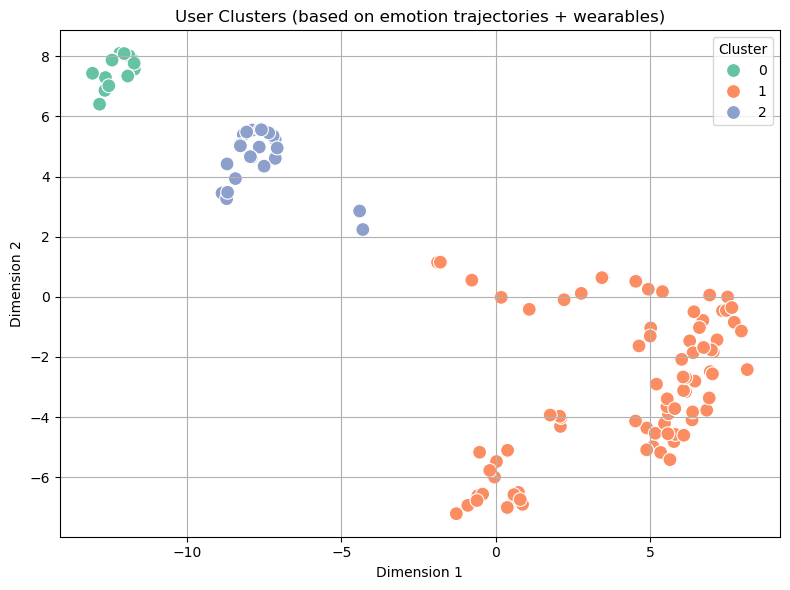

In [225]:
# -----------------------------
# Visualization (UMAP)
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# UMAP alternative: from umap import UMAP
# reducer = UMAP(n_components=2, random_state=42)
reducer = TSNE(n_components=2, random_state=42)
X_2d = reducer.fit_transform(X)

# Add to DataFrame
user_cluster_df["x"] = X_2d[:, 0]
user_cluster_df["y"] = X_2d[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_cluster_df, x="x", y="y", hue="cluster", palette="Set2", s=100)
plt.title("User Clusters (based on emotion trajectories + wearables)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


torch.Size([5811, 5811])